In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts

from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from math import sqrt
import seaborn as sns
sns.set()

In [ ]:
df =  pd.read_csv("/content/MtHoodMeadows.csv",
                   index_col="Date.Time..PST.", parse_dates=True).asfreq('H')
df=df.rename(columns={'Relative.Humidity......':'Humidity',
                      'Temperature...deg.F..':'Temperature',
                      'Wind.Direction...deg...':'Wind_direction',
                      'Wind.Speed.Average...mph..':'Wind_speed_avg',
                      'Wind.Speed.Maximum...mph..':'Wind_speed_max',
                      'Wind.Speed.Minimum...mph..':'Wind_speed_min'})

In [ ]:
df=df.drop('Unnamed: 0', axis=1)
df['Humidity'] = df['Humidity'].fillna(df['Humidity'].mean())
df['Temperature'] = df['Temperature'].fillna(df['Temperature'].mean())
df['Wind_direction'] = df['Wind_direction'].fillna(df['Wind_direction'].mean())
df['Wind_speed_avg'] = df['Wind_speed_avg'].fillna(df['Wind_speed_avg'].mean())
df['Wind_speed_max'] = df['Wind_speed_max'].fillna(df['Wind_speed_max'].mean())
df['Wind_speed_min'] = df['Wind_speed_min'].fillna(df['Wind_speed_min'].mean())


In [ ]:
df.isnull().sum()

Humidity          0
Temperature       0
Wind_direction    0
Wind_speed_avg    0
Wind_speed_max    0
Wind_speed_min    0
dtype: int64

In [ ]:
train=df.iloc[:17802:,:]
test=df.iloc[-169:,:]

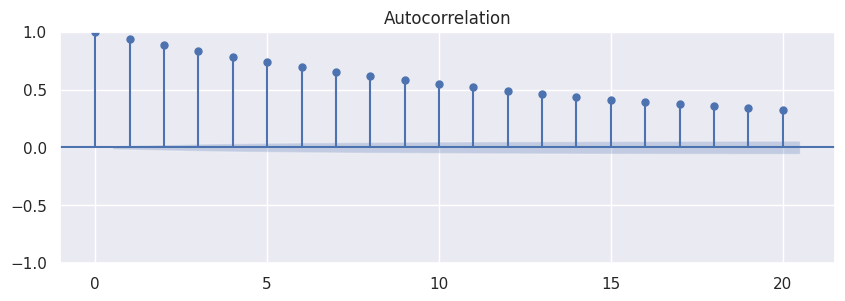

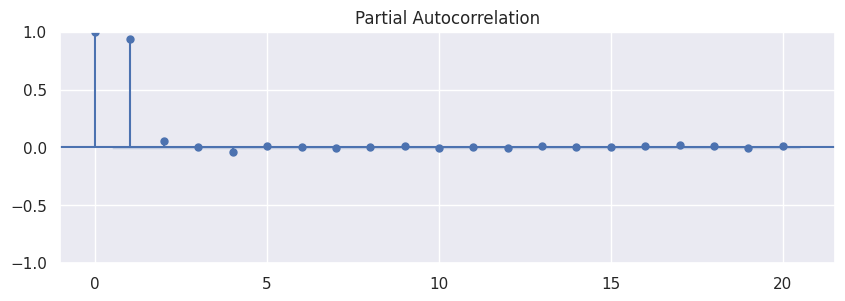

In [ ]:
plt.rcParams.update({'figure.figsize': (10,3)})
plot_acf(df.Wind_speed_max, lags=20)
plot_pacf(df.Wind_speed_max, lags=20)
plt.show()

In [ ]:
def LLR_test(result_1, result_2, DF=1):
  L1 = result_1.llf
  L2 = result_2.llf
  LR = 2 * (L2 - L1)
  p=chi2.sf(LR, DF).round(3)
  return p

In [ ]:
def mape(y_true, y_pred):
  return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [ ]:
ar_1=ARIMA(train.Wind_speed_max, order=(1,0,0))
result_ar_1=ar_1.fit()
result_ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               Humidity   No. Observations:                 8937
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -31353.514
Date:                Thu, 18 Jan 2024   AIC                          62713.029
Time:                        13:36:24   BIC                          62734.323
Sample:                    01-01-2022   HQIC                         62720.277
                         - 01-08-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.3273      2.815     22.139      0.000      56.810      67.845
ar.L1          0.9672      0.004    231.836      0.000       0.959       0.975
sigma2        65.2567      0.481    135.805      0.000      64.315      66.198
===================================================================================
Ljung-Box (L1) (Q):                  17.26   Jarque-Bera (JB):             37224.73
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.72   Skew:                            -0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
ar_2=ARIMA(train.Wind_speed_max, order=(2,0,0))
result_ar_2=ar_2.fit()
result_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               Humidity   No. Observations:                 8937
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -31344.261
Date:                Thu, 18 Jan 2024   AIC                          62696.522
Time:                        13:36:32   BIC                          62724.914
Sample:                    01-01-2022   HQIC                         62706.186
                         - 01-08-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.3268      2.953     21.104      0.000      56.538      68.115
ar.L1          0.9232      0.007    136.791      0.000       0.910       0.936
ar.L2          0.0455      0.006      7.590      0.000       0.034       0.057
sigma2        65.1221      0.478    136.102      0.000      64.184      66.060
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             37069.73
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.72   Skew:                            -0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
ar_3=ARIMA(train.Wind_speed_max, order=(3,0,0))
result_ar_3=ar_3.fit()
result_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               Humidity   No. Observations:                 8937
Model:                 ARIMA(3, 0, 0)   Log Likelihood              -31344.011
Date:                Thu, 18 Jan 2024   AIC                          62698.022
Time:                        13:36:37   BIC                          62733.512
Sample:                    01-01-2022   HQIC                         62710.103
                         - 01-08-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.3268      2.940     21.201      0.000      56.565      68.089
ar.L1          0.9235      0.007    136.593      0.000       0.910       0.937
ar.L2          0.0524      0.009      5.960      0.000       0.035       0.070
ar.L3         -0.0075      0.007     -1.047      0.295      -0.021       0.007
sigma2        65.1194      0.480    135.782      0.000      64.179      66.059
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             37217.47
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.72   Skew:                            -0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
ar_4=ARIMA(train.Wind_speed_max, order=(4,0,0))
result_ar_4=ar_4.fit()
result_ar_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               Humidity   No. Observations:                 8937
Model:                 ARIMA(4, 0, 0)   Log Likelihood              -31341.561
Date:                Thu, 18 Jan 2024   AIC                          62695.122
Time:                        13:36:45   BIC                          62737.710
Sample:                    01-01-2022   HQIC                         62709.619
                         - 01-08-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.3268      3.015     20.672      0.000      56.417      68.236
ar.L1          0.9237      0.007    136.407      0.000       0.910       0.937
ar.L2          0.0512      0.009      5.814      0.000       0.034       0.068
ar.L3         -0.0291      0.010     -2.773      0.006      -0.050      -0.009
ar.L4          0.0234      0.008      2.860      0.004       0.007       0.039
sigma2        65.0843      0.481    135.174      0.000      64.141      66.028
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             36839.22
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.72   Skew:                            -0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
ar_5=ARIMA(train.Wind_speed_max, order=(5,0,0))
result_ar_5=ar_5.fit()
result_ar_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               Humidity   No. Observations:                 8937
Model:                 ARIMA(5, 0, 0)   Log Likelihood              -31333.737
Date:                Thu, 18 Jan 2024   AIC                          62681.474
Time:                        13:37:21   BIC                          62731.160
Sample:                    01-01-2022   HQIC                         62698.387
                         - 01-08-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.3268      3.143     19.829      0.000      56.166      68.487
ar.L1          0.9227      0.007    136.414      0.000       0.909       0.936
ar.L2          0.0524      0.009      5.943      0.000       0.035       0.070
ar.L3         -0.0312      0.011     -2.970      0.003      -0.052      -0.011
ar.L4         -0.0152      0.010     -1.505      0.132      -0.035       0.005
ar.L5          0.0418      0.007      5.599      0.000       0.027       0.056
sigma2        64.9692      0.484    134.334      0.000      64.021      65.917
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             36149.36
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.72   Skew:                            -0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
ar_6=ARIMA(train.Wind_speed_max, order=(6,0,0))
result_ar_6=ar_6.fit()
result_ar_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               Humidity   No. Observations:                 8937
Model:                 ARIMA(6, 0, 0)   Log Likelihood              -31332.306
Date:                Thu, 18 Jan 2024   AIC                          62680.613
Time:                        13:37:57   BIC                          62737.396
Sample:                    01-01-2022   HQIC                         62699.941
                         - 01-08-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.3268      3.201     19.472      0.000      56.053      68.600
ar.L1          0.9220      0.007    136.339      0.000       0.909       0.935
ar.L2          0.0526      0.009      5.964      0.000       0.035       0.070
ar.L3         -0.0307      0.011     -2.917      0.004      -0.051      -0.010
ar.L4         -0.0162      0.010     -1.590      0.112      -0.036       0.004
ar.L5          0.0253      0.009      2.709      0.007       0.007       0.044
ar.L6          0.0179      0.007      2.501      0.012       0.004       0.032
sigma2        64.9494      0.483    134.333      0.000      64.002      65.897
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             36246.83
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.72   Skew:                            -0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
ar_7=ARIMA(train.Wind_speed_max, order=(7,0,0))
result_ar_7=ar_7.fit()
result_ar_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               Humidity   No. Observations:                 8937
Model:                 ARIMA(7, 0, 0)   Log Likelihood              -31332.034
Date:                Thu, 18 Jan 2024   AIC                          62682.068
Time:                        13:38:39   BIC                          62745.950
Sample:                    01-01-2022   HQIC                         62703.813
                         - 01-08-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.3268      3.226     19.321      0.000      56.004      68.649
ar.L1          0.9218      0.007    136.290      0.000       0.909       0.935
ar.L2          0.0524      0.009      5.931      0.000       0.035       0.070
ar.L3         -0.0305      0.011     -2.904      0.004      -0.051      -0.010
ar.L4         -0.0159      0.010     -1.567      0.117      -0.036       0.004
ar.L5          0.0249      0.009      2.642      0.008       0.006       0.043
ar.L6          0.0107      0.010      1.110      0.267      -0.008       0.030
ar.L7          0.0078      0.008      0.971      0.332      -0.008       0.024
sigma2        64.9464      0.483    134.354      0.000      63.999      65.894
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             36228.83
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.72   Skew:                            -0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
ma_1=ARIMA(train.Wind_speed_max, order=(0,0,1))
result_ma_1=ma_1.fit()
result_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               Humidity   No. Observations:                 8937
Model:                 ARIMA(0, 0, 1)   Log Likelihood              -38979.334
Date:                Thu, 18 Jan 2024   AIC                          77964.668
Time:                        13:38:54   BIC                          77985.962
Sample:                    01-01-2022   HQIC                         77971.916
                         - 01-08-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.3275      0.384    162.354      0.000      61.575      63.080
ma.L1          0.8331      0.006    140.220      0.000       0.821       0.845
sigma2       359.6617      9.541     37.696      0.000     340.962     378.362
===================================================================================
Ljung-Box (L1) (Q):                4001.22   Jarque-Bera (JB):               582.54
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.99   Skew:                            -0.24
Prob(H) (two-sided):                  0.72   Kurtosis:                         1.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
ma_2=ARIMA(train.Wind_speed_max, order=(0,0,2))
result_ma_2=ma_2.fit()
result_ma_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               Humidity   No. Observations:                 8937
Model:                 ARIMA(0, 0, 2)   Log Likelihood              -36353.222
Date:                Thu, 18 Jan 2024   AIC                          72714.443
Time:                        13:39:02   BIC                          72742.835
Sample:                    01-01-2022   HQIC                         72724.108
                         - 01-08-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.3274      0.429    145.175      0.000      61.486      63.169
ma.L1          1.1325      0.007    157.673      0.000       1.118       1.147
ma.L2          0.6445      0.007     87.166      0.000       0.630       0.659
sigma2       199.8114      3.852     51.876      0.000     192.262     207.361
===================================================================================
Ljung-Box (L1) (Q):                1496.34   Jarque-Bera (JB):               139.38
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                            -0.31
Prob(H) (two-sided):                  0.01   Kurtosis:                         2.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
ma_3=ARIMA(train.Wind_speed_max, order=(0,0,3))
result_ma_3=ma_3.fit()
result_ma_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               Humidity   No. Observations:                 8937
Model:                 ARIMA(0, 0, 3)   Log Likelihood              -34782.260
Date:                Thu, 18 Jan 2024   AIC                          69574.521
Time:                        13:39:13   BIC                          69610.010
Sample:                    01-01-2022   HQIC                         69586.601
                         - 01-08-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.3273      0.478    130.337      0.000      61.390      63.265
ma.L1          1.1854      0.008    154.055      0.000       1.170       1.201
ma.L2          1.0029      0.010     96.070      0.000       0.982       1.023
ma.L3          0.5238      0.008     64.391      0.000       0.508       0.540
sigma2       140.5767      2.082     67.531      0.000     136.497     144.657
===================================================================================
Ljung-Box (L1) (Q):                 612.94   Jarque-Bera (JB):               491.17
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.84   Skew:                            -0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
ma_4=ARIMA(train.Wind_speed_max, order=(0,0,4))
result_ma_4=ma_4.fit()
result_ma_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               Humidity   No. Observations:                 8937
Model:                 ARIMA(0, 0, 4)   Log Likelihood              -33831.622
Date:                Thu, 18 Jan 2024   AIC                          67675.244
Time:                        13:39:27   BIC                          67717.831
Sample:                    01-01-2022   HQIC                         67689.740
                         - 01-08-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.3271      0.535    116.543      0.000      61.279      63.375
ma.L1          1.1889      0.007    160.784      0.000       1.174       1.203
ma.L2          1.1561      0.011    102.543      0.000       1.134       1.178
ma.L3          0.8571      0.011     76.720      0.000       0.835       0.879
ma.L4          0.4142      0.008     52.944      0.000       0.399       0.430
sigma2       113.6363      1.349     84.244      0.000     110.993     116.280
===================================================================================
Ljung-Box (L1) (Q):                 233.27   Jarque-Bera (JB):              2456.19
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
ma_5=ARIMA(train.Wind_speed_max, order=(0,0,5))
result_ma_5=ma_5.fit()
result_ma_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               Humidity   No. Observations:                 8937
Model:                 ARIMA(0, 0, 5)   Log Likelihood              -33264.668
Date:                Thu, 18 Jan 2024   AIC                          66543.336
Time:                        13:41:00   BIC                          66593.022
Sample:                    01-01-2022   HQIC                         66560.249
                         - 01-08-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.3271      0.593    105.066      0.000      61.164      63.490
ma.L1          1.1777      0.008    153.892      0.000       1.163       1.193
ma.L2          1.2203      0.013     94.084      0.000       1.195       1.246
ma.L3          1.0334      0.015     69.467      0.000       1.004       1.063
ma.L4          0.6863      0.013     52.183      0.000       0.660       0.712
ma.L5          0.3216      0.009     36.572      0.000       0.304       0.339
sigma2       100.0939      1.068     93.716      0.000      98.001     102.187
===================================================================================
Ljung-Box (L1) (Q):                  87.97   Jarque-Bera (JB):              5523.13
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.78   Skew:                            -0.35
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
ma_6=ARIMA(train.Wind_speed_max, order=(0,0,6))
result_ma_6=ma_6.fit()
result_ma_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               Humidity   No. Observations:                 8937
Model:                 ARIMA(0, 0, 6)   Log Likelihood              -32875.925
Date:                Thu, 18 Jan 2024   AIC                          65767.851
Time:                        13:41:19   BIC                          65824.634
Sample:                    01-01-2022   HQIC                         65787.179
                         - 01-08-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.3270      0.638     97.678      0.000      61.076      63.578
ma.L1          1.1277      0.008    144.776      0.000       1.112       1.143
ma.L2          1.1831      0.013     92.015      0.000       1.158       1.208
ma.L3          1.0837      0.016     69.316      0.000       1.053       1.114
ma.L4          0.8545      0.016     53.604      0.000       0.823       0.886
ma.L5          0.5703      0.013     42.408      0.000       0.544       0.597
ma.L6          0.2807      0.009     30.914      0.000       0.263       0.298
sigma2        91.7556      0.908    101.081      0.000      89.976      93.535
===================================================================================
Ljung-Box (L1) (Q):                  59.54   Jarque-Bera (JB):              7748.12
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.79   Skew:                            -0.37
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
LLR_test(result_ma_5, result_ma_6)

0.125

In [ ]:
arima_1_1_1=ARIMA(train.Wind_speed_max, order=(1,1,1))
result_1_1_1=arima_1_1_1.fit()
result_1_1_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         Wind_speed_max   No. Observations:                17802
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -57083.329
Date:                Thu, 18 Jan 2024   AIC                         114172.659
Time:                        16:51:18   BIC                         114196.020
Sample:                    01-01-2022   HQIC                        114180.345
                         - 01-12-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9310      0.002    509.080      0.000       0.927       0.935
ma.L1         -0.9982      0.000  -2183.801      0.000      -0.999      -0.997
sigma2        35.7113      0.100    357.727      0.000      35.516      35.907
===================================================================================
Ljung-Box (L1) (Q):                  33.94   Jarque-Bera (JB):           1266285.02
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.84   Skew:                             0.62
Prob(H) (two-sided):                  0.00   Kurtosis:                        44.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<function matplotlib.pyplot.show(close=None, block=None)>

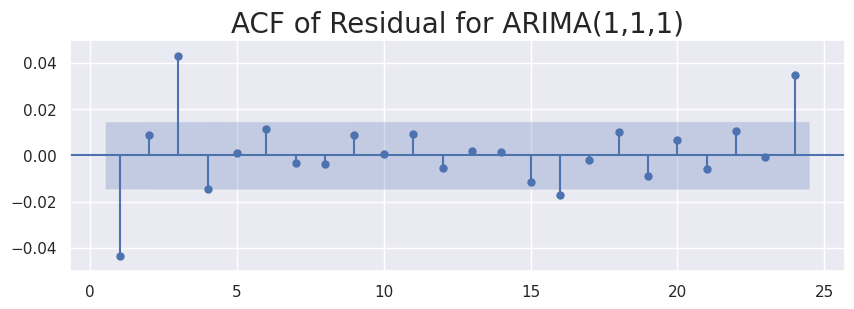

In [ ]:
sgt.plot_acf(result_1_1_1.resid[1:], zero=False, lags=24)
plt.title('ACF of Residual for ARIMA(1,1,1)', size=20)
plt.ylim(-0.05,0.05)
plt.show

In [ ]:
arima_2_1_1=ARIMA(train.Wind_speed_max, order=(2,1,1))
result_2_1_1=arima_2_1_1.fit()
arima_1_1_2=ARIMA(train.Wind_speed_max, order=(1,1,2))
result_1_1_2=arima_1_1_2.fit()
arima_2_1_2=ARIMA(train.Wind_speed_max, order=(2,1,2))
result_2_1_2=arima_2_1_2.fit()

In [ ]:
print("LL=",result_2_1_1.llf," AIC=",result_2_1_1.aic)
print("LL=",result_1_1_2.llf," AIC=",result_1_1_2.aic)
print("LL=",result_2_1_2.llf," AIC=",result_2_1_2.aic)

LL= -57309.79418714141  AIC= 114627.58837428282
LL= -57313.96342596888  AIC= 114635.92685193777
LL= -57077.92558638461  AIC= 114165.85117276922


In [ ]:
LLR_test(result_1_1_2,result_2_1_2 )

0.15

<function matplotlib.pyplot.show(close=None, block=None)>

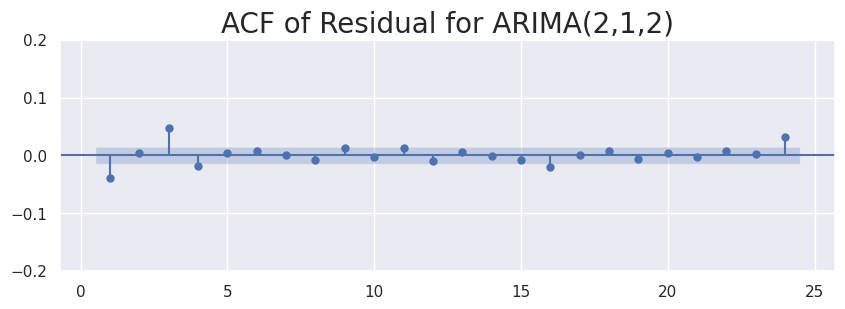

In [ ]:
sgt.plot_acf(result_2_1_2.resid, zero=False, lags=24)
plt.title('ACF of Residual for ARIMA(2,1,2)', size=20)
#plt.yticks(ticks=[i for i in range(21)], labels=[str(round(i * 0.2, 1)) for i in range(21)])
plt.ylim(-0.2,0.2)
plt.show

In [ ]:
arima_1_1_3=ARIMA(train.Wind_speed_max, order=(1,1,3))
result_1_1_3=arima_1_1_3.fit()
arima_1_1_4=ARIMA(train.Wind_speed_max, order=(1,1,4))
result_1_1_4=arima_1_1_4.fit()
arima_1_1_5=ARIMA(train.Wind_speed_max, order=(1,1,5))
result_1_1_5=arima_1_1_5.fit()
arima_1_1_6=ARIMA(train.Wind_speed_max, order=(1,1,6))
result_1_1_6=arima_1_1_6.fit()

arima_2_1_3=ARIMA(train.Wind_speed_max, order=(2,1,3))
result_2_1_3=arima_2_1_3.fit()
arima_2_1_4=ARIMA(train.Wind_speed_max, order=(2,1,4))
result_2_1_4=arima_2_1_4.fit()
arima_2_1_5=ARIMA(train.Wind_speed_max, order=(2,1,5))
result_2_1_5=arima_2_1_5.fit()
arima_2_1_6=ARIMA(train.Wind_speed_max, order=(2,1,6))
result_2_1_6=arima_2_1_6.fit()

arima_3_1_1=ARIMA(train.Wind_speed_max, order=(3,1,1))
result_3_1_1=arima_3_1_1.fit()
arima_3_1_2=ARIMA(train.Wind_speed_max, order=(3,1,2))
result_3_1_2=arima_3_1_2.fit()
arima_3_1_3=ARIMA(train.Wind_speed_max, order=(3,1,3))
result_3_1_3=arima_3_1_3.fit()
arima_3_1_4=ARIMA(train.Wind_speed_max, order=(3,1,4))
result_3_1_4=arima_3_1_4.fit()
arima_3_1_5=ARIMA(train.Wind_speed_max, order=(3,1,5))
result_3_1_5=arima_3_1_5.fit()
arima_3_1_6=ARIMA(train.Wind_speed_max, order=(3,1,6))
result_3_1_6=arima_3_1_6.fit()

arima_4_1_1=ARIMA(train.Wind_speed_max, order=(4,1,1))
result_4_1_1=arima_4_1_1.fit()
arima_4_1_2=ARIMA(train.Wind_speed_max, order=(4,1,2))
result_4_1_2=arima_4_1_2.fit()
arima_4_1_3=ARIMA(train.Wind_speed_max, order=(4,1,3))
result_4_1_3=arima_4_1_3.fit()
arima_4_1_4=ARIMA(train.Wind_speed_max, order=(4,1,4))
result_4_1_4=arima_4_1_4.fit()
arima_4_1_5=ARIMA(train.Wind_speed_max, order=(4,1,5))
result_4_1_5=arima_4_1_5.fit()
arima_4_1_6=ARIMA(train.Wind_speed_max, order=(4,1,6))
result_4_1_6=arima_4_1_6.fit()

arima_5_1_1=ARIMA(train.Wind_speed_max, order=(5,1,1))
result_5_1_1=arima_5_1_1.fit()
arima_5_1_2=ARIMA(train.Wind_speed_max, order=(5,1,2))
result_5_1_2=arima_5_1_2.fit()
arima_5_1_3=ARIMA(train.Wind_speed_max, order=(5,1,3))
result_5_1_3=arima_5_1_3.fit()
arima_5_1_4=ARIMA(train.Wind_speed_max, order=(5,1,4))
result_5_1_4=arima_5_1_4.fit()
arima_5_1_5=ARIMA(train.Wind_speed_max, order=(5,1,5))
result_5_1_5=arima_5_1_5.fit()
arima_5_1_6=ARIMA(train.Wind_speed_max, order=(5,1,6))
result_5_1_6=arima_5_1_6.fit()

arima_6_1_1=ARIMA(train.Wind_speed_max, order=(6,1,1))
result_6_1_1=arima_6_1_1.fit()
arima_6_1_2=ARIMA(train.Wind_speed_max, order=(6,1,2))
result_6_1_2=arima_6_1_2.fit()
arima_6_1_3=ARIMA(train.Wind_speed_max, order=(6,1,3))
result_6_1_3=arima_6_1_3.fit()
arima_6_1_4=ARIMA(train.Wind_speed_max, order=(6,1,4))
result_6_1_4=arima_6_1_4.fit()
arima_6_1_5=ARIMA(train.Wind_speed_max, order=(6,1,5))
result_6_1_5=arima_6_1_5.fit()
arima_6_1_6=ARIMA(train.Wind_speed_max, order=(6,1,6))
result_6_1_6=arima_6_1_6.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels

In [ ]:
print("LL=",result_1_1_1.llf," AIC=",result_1_1_1.aic)
print("LL=",result_1_1_2.llf," AIC=",result_1_1_2.aic)
print("LL=",result_1_1_3.llf," AIC=",result_1_1_3.aic)
print("LL=",result_1_1_4.llf," AIC=",result_1_1_4.aic)
print("LL=",result_1_1_5.llf," AIC=",result_1_1_5.aic)
print("LL=",result_1_1_6.llf," AIC=",result_1_1_6.aic)
print("\n")
print("LL=",result_2_1_1.llf," AIC=",result_2_1_1.aic)
print("LL=",result_2_1_2.llf," AIC=",result_2_1_2.aic)
print("LL=",result_2_1_3.llf," AIC=",result_2_1_3.aic)
print("LL=",result_2_1_4.llf," AIC=",result_2_1_4.aic)
print("LL=",result_2_1_5.llf," AIC=",result_2_1_5.aic)
print("LL=",result_2_1_6.llf," AIC=",result_2_1_6.aic)
print("\n")
print("LL=",result_3_1_1.llf," AIC=",result_3_1_1.aic)
print("LL=",result_3_1_2.llf," AIC=",result_3_1_2.aic)
print("LL=",result_3_1_3.llf," AIC=",result_3_1_3.aic)
print("LL=",result_3_1_4.llf," AIC=",result_3_1_4.aic)
print("LL=",result_3_1_5.llf," AIC=",result_3_1_5.aic)
print("LL=",result_3_1_6.llf," AIC=",result_3_1_6.aic)
print("\n")
print("LL=",result_4_1_1.llf," AIC=",result_4_1_1.aic)
print("LL=",result_4_1_2.llf," AIC=",result_4_1_2.aic)
print("LL=",result_4_1_3.llf," AIC=",result_4_1_3.aic)
print("LL=",result_4_1_4.llf," AIC=",result_4_1_4.aic)
print("LL=",result_4_1_5.llf," AIC=",result_4_1_5.aic)
print("LL=",result_4_1_6.llf," AIC=",result_4_1_6.aic)
print("\n")
print("LL=",result_5_1_1.llf," AIC=",result_5_1_1.aic)
print("LL=",result_5_1_2.llf," AIC=",result_5_1_2.aic)
print("LL=",result_5_1_3.llf," AIC=",result_5_1_3.aic)
print("LL=",result_5_1_4.llf," AIC=",result_5_1_4.aic)
print("LL=",result_5_1_5.llf," AIC=",result_5_1_5.aic)
print("LL=",result_5_1_6.llf," AIC=",result_5_1_6.aic)
print("\n")
print("LL=",result_6_1_1.llf," AIC=",result_6_1_1.aic)
print("LL=",result_6_1_2.llf," AIC=",result_6_1_2.aic)
print("LL=",result_6_1_3.llf," AIC=",result_6_1_3.aic)
print("LL=",result_6_1_4.llf," AIC=",result_6_1_4.aic)
print("LL=",result_6_1_5.llf," AIC=",result_6_1_5.aic)
print("LL=",result_6_1_6.llf," AIC=",result_6_1_6.aic)

LL= -57083.32940633744  AIC= 114172.65881267488
LL= -57313.96342596888  AIC= 114635.92685193777
LL= -57063.408102986235  AIC= 114136.81620597247
LL= -57049.92825686051  AIC= 114111.85651372102
LL= -57047.83813207474  AIC= 114109.67626414949
LL= -57047.83369600195  AIC= 114111.6673920039


LL= -57309.79418714141  AIC= 114627.58837428282
LL= -57077.92558638461  AIC= 114165.85117276922
LL= -57060.34582260043  AIC= 114132.69164520086
LL= -57048.23061880905  AIC= 114110.4612376181
LL= -57044.84591812935  AIC= 114105.6918362587
LL= -57047.154648444004  AIC= 114112.30929688801


LL= -57309.7700162126  AIC= 114629.5400324252
LL= -57060.87883093928  AIC= 114133.75766187855
LL= -57075.68672482071  AIC= 114165.37344964143
LL= -57053.349929747885  AIC= 114122.69985949577
LL= -57048.1868977782  AIC= 114114.3737955564
LL= -57049.70482199901  AIC= 114119.40964399802


LL= -57048.78000375155  AIC= 114109.5600075031
LL= -57050.012977578524  AIC= 114114.02595515705
LL= -57054.91560969986  AIC= 114125.83

<function matplotlib.pyplot.show(close=None, block=None)>

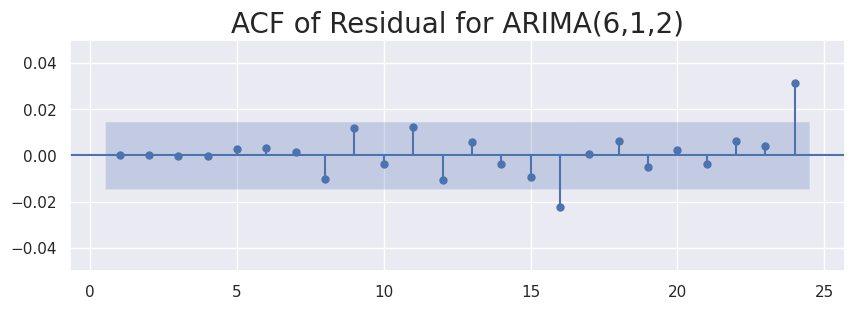

In [ ]:
sgt.plot_acf(result_6_1_2.resid, zero=False, lags=24)
plt.title('ACF of Residual for ARIMA(6,1,2)', size=20)
plt.ylim(-0.05,0.05)
plt.show

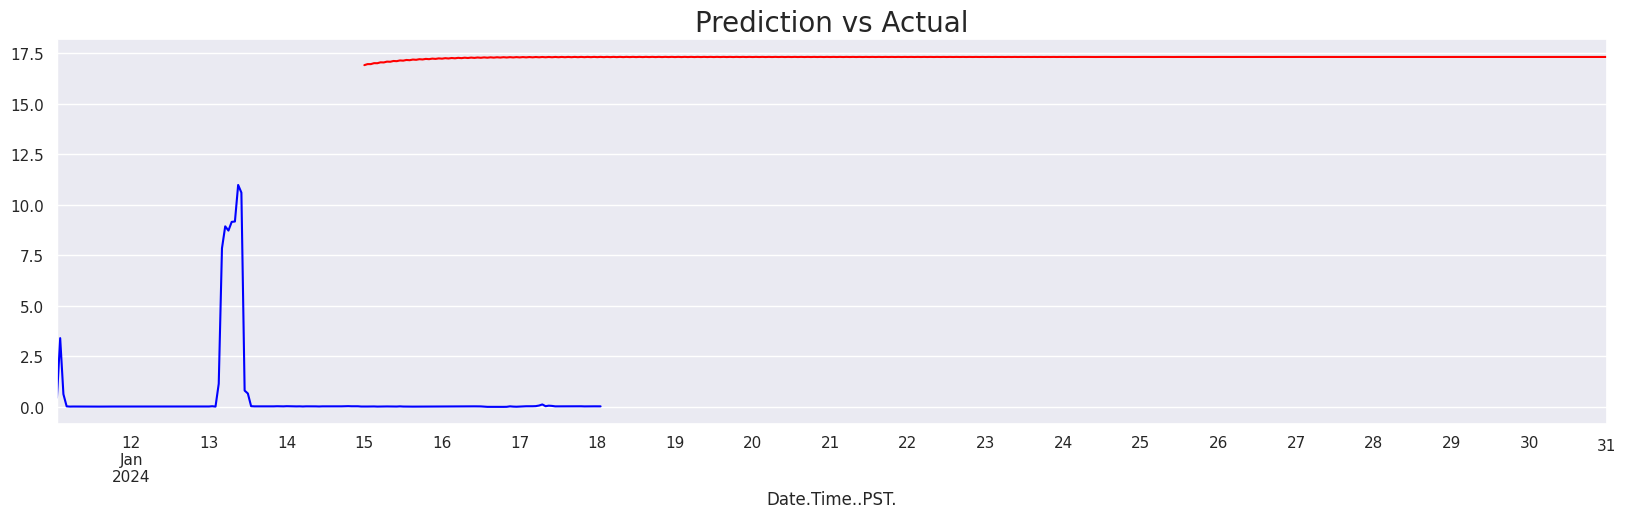

In [ ]:
start_date="2024-01-15"
end_date="2024-01-31"

predictions = result_6_1_2.predict(start=start_date, end=end_date)

predictions.plot(figsize = (20,5), color="red")
test['Wind_speed_avg']['2024-01-11':'2024-01-18'].plot(color="blue")
plt.title("Prediction vs Actual", size=20)
plt.show()


In [ ]:
results = pd.DataFrame(predictions)

In [ ]:
auto=auto_arima(train.Wind_speed_max)

In [ ]:
res=auto.fit(train.Wind_speed_max)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                17802
Model:               SARIMAX(0, 1, 2)   Log Likelihood              -57313.936
Date:                Thu, 18 Jan 2024   AIC                         114633.873
Time:                        17:14:42   BIC                         114657.234
Sample:                    01-01-2022   HQIC                        114641.559
                         - 01-12-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0819      0.002    -36.295      0.000      -0.086      -0.077
ma.L2         -0.0246      0.005     -4.651      0.000      -0.035      -0.014
sigma2        36.6649      0.102    360.835      0.000      36.466      36.864
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           1130691.09
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                             0.50
Prob(H) (two-sided):                  0.00   Kurtosis:                        42.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
results

predicted_mean
2024-01-15 00:00:00       16.923307
2024-01-15 01:00:00       16.974477
2024-01-15 02:00:00       16.974081
2024-01-15 03:00:00       17.021394
2024-01-15 04:00:00       17.018351
...                             ...
2024-01-30 20:00:00       17.328407
2024-01-30 21:00:00       17.328968
2024-01-30 22:00:00       17.328413
2024-01-30 23:00:00       17.328962
2024-01-31 00:00:00       17.328418

[385 rows x 1 columns]

In [ ]:
results.to_excel("/content/Wind_speed_max.xlsx", encoding='utf-8')

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning: the 'encoding' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'encoding'
  return func(*args, **kwargs)


In [ ]:
data=pd.read_excel("/content/Wind_speed_max.xlsx")
data

Unnamed: 0  predicted_mean
0   2024-01-15 00:00:00       16.923307
1   2024-01-15 01:00:00       16.974477
2   2024-01-15 02:00:00       16.974081
3   2024-01-15 03:00:00       17.021394
4   2024-01-15 04:00:00       17.018351
..                  ...             ...
380 2024-01-30 20:00:00       17.328407
381 2024-01-30 21:00:00       17.328968
382 2024-01-30 22:00:00       17.328413
383 2024-01-30 23:00:00       17.328962
384 2024-01-31 00:00:00       17.328418

[385 rows x 2 columns]